In [1]:
import numpy as np

import pylab
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.ndimage import zoom
from scipy.ndimage import median_filter

import caffe
caffe.set_device(0)
caffe.set_mode_gpu()

In [2]:
mean_pixel = np.array([104.008, 116.669, 122.675])
def preprocess(image, size):

    image = np.array(image)
    H, W, _ = image.shape
    image = zoom(image.astype('float32'), (size / H, size / W, 1.0), order=1)

    image = image[:, :, [2, 1, 0]]
    image = image - mean_pixel

    image = image.transpose([2, 0, 1])
    return image

In [3]:
net = caffe.Net('deploy.prototxt', 'weights.caffemodel', caffe.TEST)

In [4]:
image = pylab.imread('example.jpg')
H, W, _ = image.shape

In [5]:
net.blobs['images'].data[...][0] = preprocess(image, 321.0)
net.forward()

net.blobs['fc8'].diff[...] = 1.0
net.backward(start='fc8')
    
grad = net.blobs['conv4_1'].diff[...][0]
grad = median_filter(np.max(np.abs(grad), axis=0), 3)

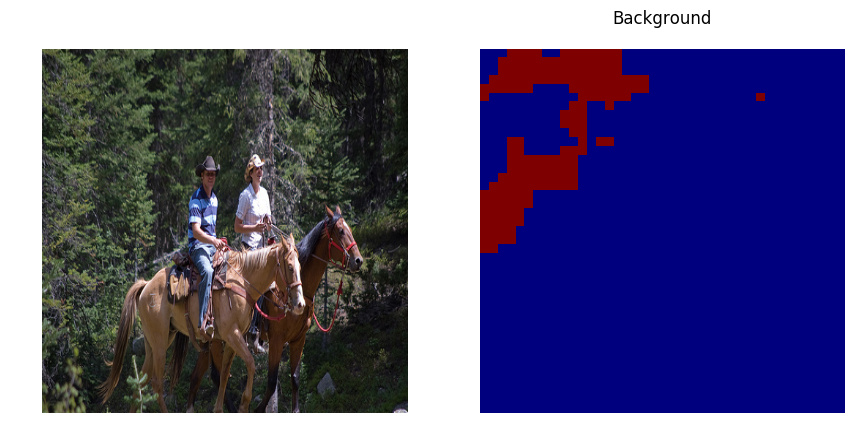

In [6]:
f = plt.figure(figsize=(16, 8))

ax = f.add_subplot(1, 3, 1)
ax.imshow(image, aspect=W / float(H))
ax.axis('off')

ax = f.add_subplot(1, 3, 2)
thr = np.sort(grad.ravel())[int(0.1 * 41 ** 2)]
ax.matshow(grad < thr)
ax.set_title('Background')
ax.axis('off')

plt.show()